In [2]:
#Importing the important libraries
import pandas as pd
import geopandas as gp
# Folium for plotting maps
import folium
from shapely import Polygon 

In [14]:
df = pd.read_pickle("data/poi/poi_prepared.pickle")

In [143]:
# Building a dictionary/Series to get Polygons from hexcodes
Series_9 = df[["hex_9", "pol_9"]].reset_index().drop(columns="osmid").set_index("hex_9").drop_duplicates()["pol_9"]
Series_8 = df[["hex_8", "pol_8"]].reset_index().drop(columns="osmid").set_index("hex_8").drop_duplicates()["pol_8"]
Series_7 = df[["hex_7", "pol_7"]].reset_index().drop(columns="osmid").set_index("hex_7").drop_duplicates()["pol_7"]
hex_series = pd.concat([Series_9, Series_8, Series_7])

In [166]:
# Creating Counts for the Categories
groupedDF_9 = pd.DataFrame(df.groupby(["hex_9", "category"]).count()["hex_8"]).reset_index().set_index("hex_9").rename(columns = {"hex_8": "count"})
groupedDF_8 = pd.DataFrame(df.groupby(["hex_8", "category"]).count()["hex_7"]).reset_index().set_index("hex_8").rename(columns = {"hex_7": "count"})
groupedDF_7 = pd.DataFrame(df.groupby(["hex_7", "category"]).count()["hex_9"]).reset_index().set_index("hex_7").rename(columns = {"hex_9": "count"})

# Appending Geometry
groupedDF_9 = groupedDF_9.merge(hex_series.to_frame(), left_index=True, right_index=True).rename(columns={0: "geometry"})
groupedDF_8 = groupedDF_8.merge(hex_series.to_frame(), left_index=True, right_index=True).rename(columns={0: "geometry"})
groupedDF_7 = groupedDF_7.merge(hex_series.to_frame(), left_index=True, right_index=True).rename(columns={0: "geometry"})

In [167]:
x = groupedDF_9[groupedDF_9["category"] == "parking"]

In [235]:
x

,hex_9,category,count,geometry
0,89f16253423ffff,parking,4,POLYGON ((41.78835811350712 -87.52943214118146...
1,89f16253427ffff,parking,12,POLYGON ((41.72053817860625 -87.52804370289121...
2,89f1625342fffff,parking,13,POLYGON ((41.781695193378475 -87.5261149667633...
3,89f16253433ffff,parking,1,POLYGON ((41.79503890575854 -87.53274926576775...
4,89f16253437ffff,parking,5,POLYGON ((41.72712439666553 -87.53136121501583...
...,...,...,...,...
389,89f175a5d4bffff,parking,3,POLYGON ((42.06882931369253 -87.90634745962299...
390,89f175a5d4fffff,parking,6,POLYGON ((41.988650274314836 -87.9049785400135...
391,89f175a5d53ffff,parking,5,POLYGON ((42.00506587395881 -87.91160743773375...
392,89f175a5dcbffff,parking,8,"POLYGON ((42.01331272680906 -87.9149217936903,..."


In [250]:
#x.to_json()
gdf = gp.GeoDataFrame(x, geometry='geometry', crs = "EPSG:4326")
y = gdf.to_json()

<Axes: >

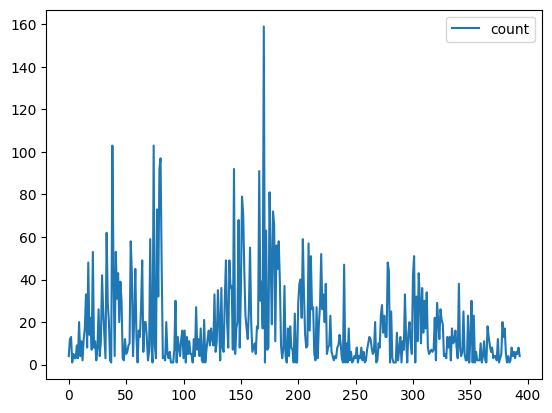

In [252]:
x.plot()

<Axes: >

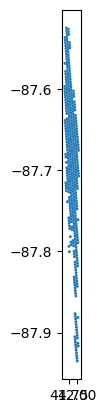

In [251]:
gdf.plot()

In [217]:
y

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"hex_9": "89f16253423ffff", "category": "parking", "count": 4}, "geometry": {"type": "Polygon", "coordinates": [[[41.78835811350712, -87.52943214118146], [41.76353075516919, -87.5278639545083], [41.72053817860625, -87.52804370289121], [41.70231591702381, -87.52979187899103], [41.72712439666553, -87.53136121501583], [41.77017406588255, -87.53118122535389], [41.78835811350712, -87.52943214118146]]]}}, {"id": "1", "type": "Feature", "properties": {"hex_9": "89f16253427ffff", "category": "parking", "count": 12}, "geometry": {"type": "Polygon", "coordinates": [[[41.72053817860625, -87.52804370289121], [41.69576703192946, -87.52647422258264], [41.65279256249903, -87.52665177079896], [41.63453223265833, -87.5283990373515], [41.65928439123945, -87.52996966546766], [41.70231591702381, -87.52979187899103], [41.72053817860625, -87.52804370289121]]]}}, {"id": "2", "type": "Feature", "properties": {"hex_9": "8

In [213]:
m = folium.Map([41.88065, -87.62642], zoom_start=10)
folium.GeoJson(y)
m

In [232]:
m = folium.Map([41.88065, -87.62642], zoom_start=10)

folium.Choropleth(
            geo_data=gdf,
            data=x,
            columns=["hex_9", "count"],  #Here we tell folium to get the county fips and plot new_cases_7days metric for each county
            key_on='features.properties.hex_9', #Here we grab the geometries/county boundaries from the geojson file using the key 'coty_code' which is the same as county fips
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='New Cases Past 7 Days (Per 100K Population) ', #title of the legend
            line_color='black').add_to(m) 

m

AttributeError: 'NoneType' object has no attribute 'get'

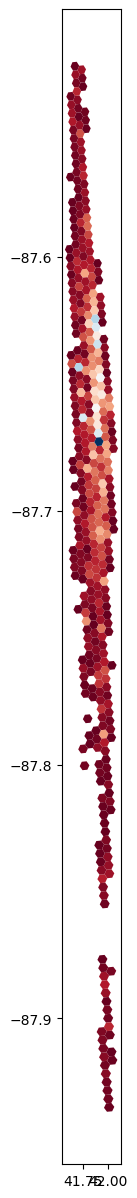

In [221]:
ax = gdf.plot(figsize=(15, 15), column='count', cmap='RdBu')